# ANALISIS EXPLORATORIO DE DATOS
## Data Weather

## Importacion de Librerias y Carga de Datos

In [79]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
plt.style.use('ggplot')

## Datos

Importación de datos del csv descargado, tambien está la opción de importarla desde un link directo, dependiendo de la fuente.

In [ ]:
## Dowload DataSet:
# https://www.kaggle.com/datasets/heidarmirhajisadati/germany-city-rainfall-data

data = pd.read_csv("data/Rainfall_Data_Germany_Complete.csv")
print(data.head(5))

     City  Latitude  Longitude  Month  Year  Rainfall (mm)  Elevation (m)  \
0  Berlin     52.52     13.405      1  2015          71.56             34   
1  Berlin     52.52     13.405      2  2015         129.56             34   
2  Berlin     52.52     13.405      3  2015          24.58             34   
3  Berlin     52.52     13.405      4  2015         177.73             34   
4  Berlin     52.52     13.405      5  2015         100.62             34   

  Climate_Type  Temperature (°C)  Humidity (%)  
0      Oceanic              19.6            72  
1      Oceanic              31.4            88  
2      Oceanic              15.4            61  
3      Oceanic              15.1            62  
4      Oceanic              -3.0            57  


### Descripcion general de datos

Con funciones como .info() se pueden observar la cantidad de datos, el tipo de datos de columnas, si hay o no datos nulos, entre otra información

In [81]:
print(data.info())
print()
# Verificar duplicados
print(f"Registros ducplicados encontrados: {data.duplicated().sum()}")  # Número de filas duplicadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              1080 non-null   object 
 1   Latitude          1080 non-null   float64
 2   Longitude         1080 non-null   float64
 3   Month             1080 non-null   int64  
 4   Year              1080 non-null   int64  
 5   Rainfall (mm)     1080 non-null   float64
 6   Elevation (m)     1080 non-null   int64  
 7   Climate_Type      1080 non-null   object 
 8   Temperature (°C)  1080 non-null   float64
 9   Humidity (%)      1080 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 84.5+ KB
None

Registros ducplicados encontrados: 0


## Columnas del DataFrame

Si se precisa ver solamente las columnas del DataFrame

In [82]:
data.columns

Index(['City', 'Latitude', 'Longitude', 'Month', 'Year', 'Rainfall (mm)',
       'Elevation (m)', 'Climate_Type', 'Temperature (°C)', 'Humidity (%)'],
      dtype='object')

## Descripcion de Datos No Numericos

In [103]:
print("Numero de Valores Unicos de Tipo",
      f"de Clima: {data['Climate_Type'].nunique()}")
print(data['Climate_Type'].value_counts())
print()

print(f"Numero de Valores Unicos de Ciudad: {data['City'].nunique()}")
print(data['City'].value_counts())
print()

Numero de Valores Unicos de Tipo de Clima: 2
Climate_Type
Oceanic        648
Continental    432
Name: count, dtype: int64

Numero de Valores Unicos de Ciudad: 10
City
Berlin        108
Munich        108
Hamburg       108
Cologne       108
Frankfurt     108
Stuttgart     108
Dusseldorf    108
Dresden       108
Leipzig       108
Hanover       108
Name: count, dtype: int64



## Descripcion de los Datos Numericos

In [84]:
print(data.describe())

          Latitude    Longitude        Month         Year  Rainfall (mm)  \
count  1080.000000  1080.000000  1080.000000  1080.000000    1080.000000   
mean     51.002410    10.242190     6.500000  2019.000000      99.211787   
std       1.576498     2.351316     3.453652     2.583185      57.560449   
min      48.135100     6.773500     1.000000  2015.000000       0.000000   
25%      50.110900     8.682100     3.750000  2017.000000      49.500000   
50%      51.139050     9.862850     6.500000  2019.000000      99.425000   
75%      52.375900    12.373100     9.250000  2021.000000     149.527500   
max      53.551100    13.737300    12.000000  2023.000000     199.910000   

       Elevation (m)  Temperature (°C)  Humidity (%)  
count     1080.00000       1080.000000   1080.000000  
mean       127.20000         14.724259     65.153704  
std        145.90981         11.433380     20.303775  
min          6.00000         -5.000000     30.000000  
25%         37.00000          4.975000  

### Agrupacion de datos

In [85]:
newdf = data.groupby("City")["Rainfall (mm)"].describe()
print(newdf)

            count        mean        std   min      25%      50%       75%  \
City                                                                         
Berlin      108.0   93.916204  56.299867  0.03  52.4800   90.705  141.7025   
Cologne     108.0  107.924722  58.387136  0.00  60.2700  115.550  157.7650   
Dresden     108.0  105.138519  57.727262  2.88  52.9000  115.975  152.5625   
Dusseldorf  108.0   95.028056  54.275231  1.06  44.3575   96.910  139.5750   
Frankfurt   108.0   94.446574  57.030150  1.66  51.4600   86.635  137.8750   
Hamburg     108.0  101.365463  59.186303  1.81  49.1225  100.485  153.3875   
Hanover     108.0   96.799815  54.305076  0.13  47.2150   95.125  148.7600   
Leipzig     108.0  100.441111  60.542682  3.83  42.3100   98.885  156.7800   
Munich      108.0   99.247685  61.244167  0.27  48.3950   95.790  155.1200   
Stuttgart   108.0   97.809722  56.903129  0.40  49.6375  100.580  146.8075   

               max  
City                
Berlin      193.21  


### Tablas cruzadas de Datos

In [86]:
pd.crosstab(data["City"],data["Climate_Type"])

Climate_Type,Continental,Oceanic
City,,
Berlin,0,108
Cologne,0,108
Dresden,108,0
Dusseldorf,0,108
Frankfurt,0,108
Hamburg,0,108
Hanover,0,108
Leipzig,108,0
Munich,108,0


## Analisis grafico de Variables

### Histograma de Variables

El Histograma mostrara si los datos de alguna forma muestra una tendencia hacia un valor especifico y la función normal, es la funcion teórica que debe seguir una distribucion que muestra ese patrón

In [87]:
df_var = data[['Rainfall (mm)','Temperature (°C)', 'Humidity (%)']]

In [ ]:
num_columns = len(df_var.columns)

fig, ax = plt.subplots(1, 3,figsize=(10,2))
ax = ax.flatten()

for idx, column in enumerate(df_var):
    df_temp = df_var[column]
    mu, sigma = stats.norm.fit(df_temp)
    x_hat = np.linspace(min(df_temp), max(df_temp), num = 100)
    y_hat = stats.norm.pdf(x_hat,mu,sigma)

    #  -----------  Graficos de distribucion
    ax[idx].plot(x_hat, y_hat, 
                 linewidth = 2, label = "F. Normal", color = "red")
    
    ax[idx].hist(x=df_temp, 
                 density=True, bins=40, color="#3182bd", alpha=0.6) 
    
    ax[idx].set_title(f'Distribución de {column}',fontsize = 10)
    ax[idx].set_ylabel('Densidad de probabilidad')
    ax[idx].legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=1)
    
# Eliminar títulos de los ejes Y
for ax in ax:
    ax.set_ylabel("")

# Ajustar el espacio entre subplots
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)

NameError: name 'df_var' is not defined

### Graficos de Q-Q
Otra representación utilizada con frecuencia son los gráficos de cuantiles teóricos (Gráficos Q-Q). 

Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

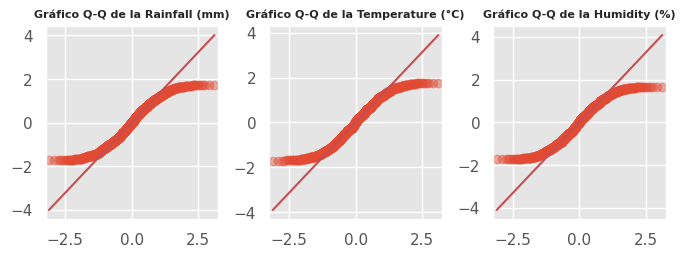

In [89]:
num_columns = len(df_var.columns)

fig, ax = plt.subplots(1, num_columns,figsize=(8,2.5))
ax = ax.flatten()

for idx, column in enumerate(df_var):
    sm.qqplot(data=df_var[column], fit = True, line  = 'q', 
              alpha = 0.4, lw = 2, ax = ax[idx])
    
    ax[idx].set_title(f'Gráfico Q-Q de la {column}', 
                      fontsize = 8, fontweight = "bold")

for ax in ax:
    ax.set_ylabel("")  # Quitar título del eje Y
    ax.set_xlabel("")  # Quitar título del eje x
    
# Ajustar el espacio entre subplots
plt.subplots_adjust(hspace=0.9)
plt.subplots_adjust(wspace=0.3)
plt.show()

### Diagrama de cajas

Dependiendo de los valores del eje Y, puede ser conveneniente graficarlos por separado, para ver bien los limites de la grafica en cada caso.

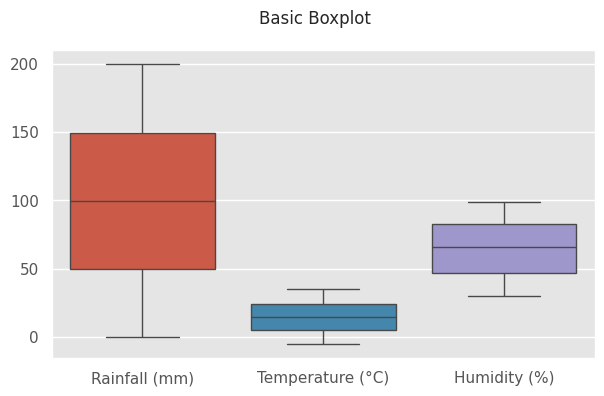

In [90]:
plt.figure(figsize=(7, 4))

sns.boxplot(data=df_var)

plt.suptitle('Basic Boxplot') 
plt.show()

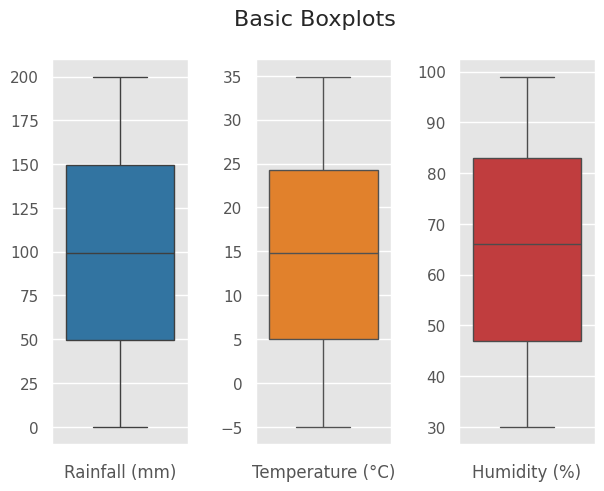

In [ ]:
fig,ax = plt.subplots(1,3,figsize = (7,5))
c = 0

plt.suptitle("Basic Boxplots", fontsize=16)

colors = ["#1f77b4", "#ff7f0e", "#d62728", "#2ca02c"]
for i in df_var:
    sns.boxplot(data=df_var[i], ax = ax[c], color = colors[c])
    ax[c].set_xlabel(i)
    c += 1
# Ajustar el espacio entre subplots
plt.subplots_adjust(wspace=0.5)
# Eliminar títulos de los ejes Y
for ax in ax:
    ax.set_ylabel("")

#plt.title('Basic Boxppalette = lot') 
plt.show()

### Pair Plot

Una cuadrícula de ejes de modo que cada numérico variable en data se compartirá en los ejes y en una sola fila y los ejes x a través de una sola columna

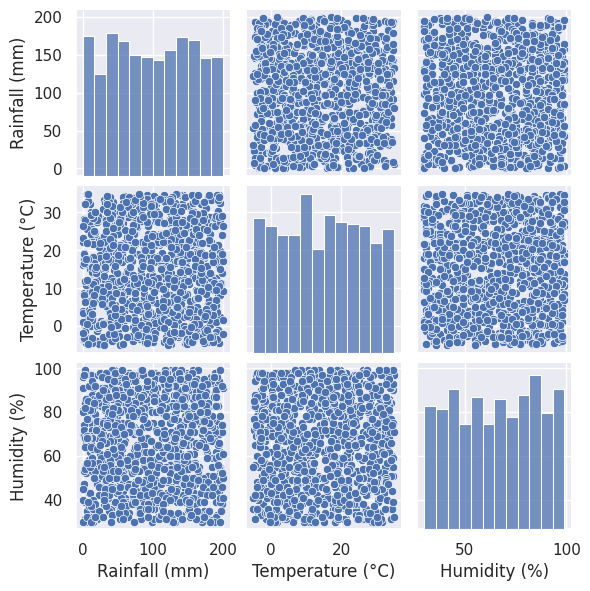

In [92]:
sns.set()
sns.pairplot(df_var,height=2)
plt.show()

## Creacion de Tablas Agrupadas, para analisis Temporal de Variables

In [93]:
# Agrupar por año-mes
datapmesyear = data.groupby(["Month", "Year"]).agg({
    "Rainfall (mm)": "mean",
    "Temperature (°C)": "mean",
    "Humidity (%)": "mean"
}).reset_index()

# Agrupar por año
datapyear = datapmesyear.groupby(["Year"]).agg({
    "Rainfall (mm)": "sum",
    "Temperature (°C)": "mean",
    "Humidity (%)": "mean"
}).reset_index()

# Agrupar por mes
datapmes = data.groupby(["Month"]).agg({
    "Rainfall (mm)": "mean",
    "Temperature (°C)": "mean",
    "Humidity (%)": "mean"
}).reset_index()

print(datapmesyear.head(5))
print()
print(datapyear)
print()
print(datapmes)

   Month  Year  Rainfall (mm)  Temperature (°C)  Humidity (%)
0      1  2015         77.276             13.21          62.3
1      1  2016        119.093             15.05          61.3
2      1  2017        117.977             15.22          66.2
3      1  2018         99.510             12.91          51.1
4      1  2019        102.092             19.32          54.6

   Year  Rainfall (mm)  Temperature (°C)  Humidity (%)
0  2015       1184.969         14.402500     63.750000
1  2016       1212.427         14.345000     66.241667
2  2017       1205.000         15.623333     65.991667
3  2018       1113.007         16.520833     62.850000
4  2019       1255.997         15.535833     66.933333
5  2020       1282.551         13.565000     67.500000
6  2021       1156.941         14.841667     68.108333
7  2022       1130.576         13.775833     63.191667
8  2023       1173.405         13.908333     61.816667

    Month  Rainfall (mm)  Temperature (°C)  Humidity (%)
0       1     102.3

## Analisis Temporal

### Comportamiento de Variable Precipitación

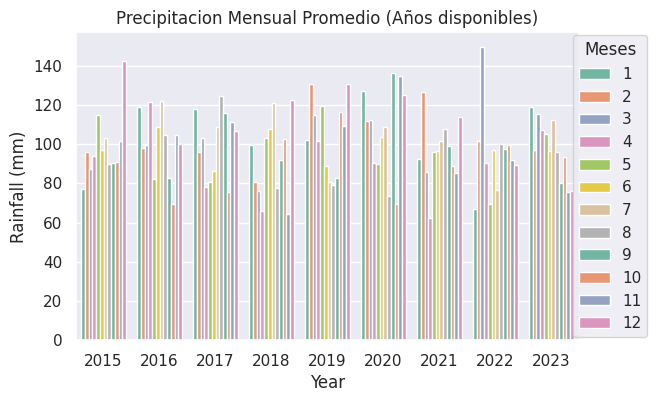

In [94]:
fig, ax = plt.subplots(figsize = (6.5,4))
sns.barplot(data = datapmesyear, x = "Year", y = "Rainfall (mm)", 
            hue ="Month", palette="Set2")

ax.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1,title="Meses")
ax.set_title("Precipitacion Mensual Promedio (Años disponibles)")
plt.show()

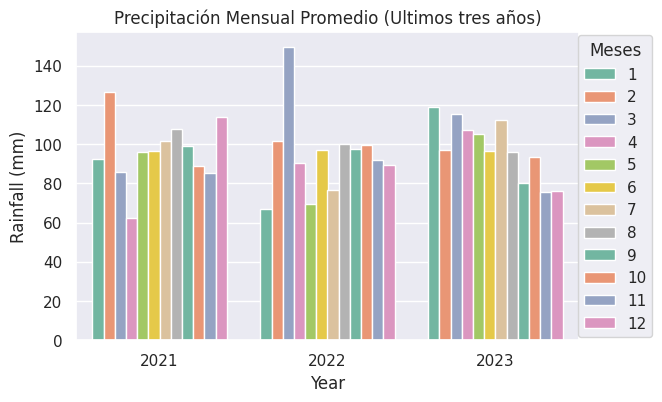

In [95]:
fig, ax = plt.subplots(figsize = (6.5,4))
sns.barplot(data = datapmesyear[datapmesyear["Year"] >= 2021], 
            x = "Year", y = "Rainfall (mm)", hue ="Month", palette="Set2")

ax.legend(loc='right', bbox_to_anchor=(1.16, 0.5), ncol=1,title="Meses")
ax.set_title("Precipitación Mensual Promedio (Ultimos tres años)")
plt.show()

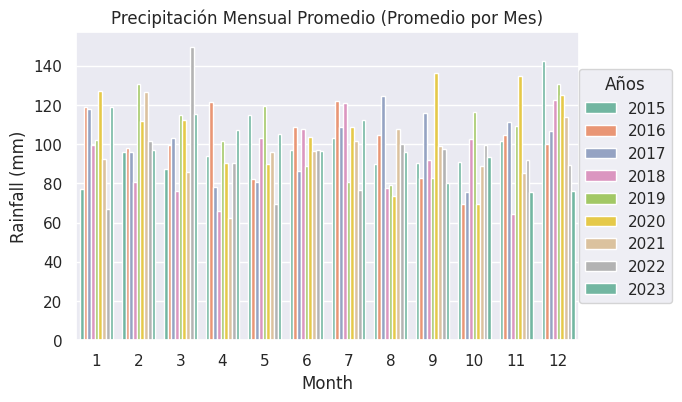

In [96]:
ig, ax = plt.subplots(figsize = (6.5,4))
sns.barplot(data = datapmesyear, x = "Month", 
            y = "Rainfall (mm)", hue ="Year", palette="Set2")
ax.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1,title="Años")
ax.set_title("Precipitación Mensual Promedio (Promedio por Mes)")
plt.show()

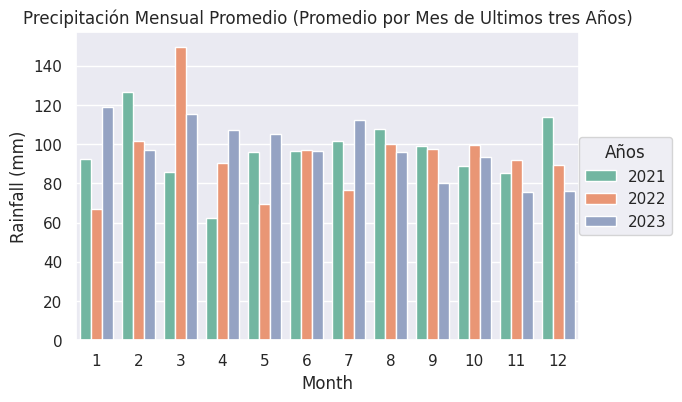

In [97]:
fig, ax = plt.subplots(figsize = (6.5,4))
sns.barplot(data = datapmesyear[datapmesyear["Year"]>=2021], 
            x = "Month", y = "Rainfall (mm)", hue ="Year", palette="Set2")
ax.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1,title="Años")
ax.set_title("Precipitación Mensual Promedio (Promedio por Mes de Ultimos tres Años)")
plt.show()

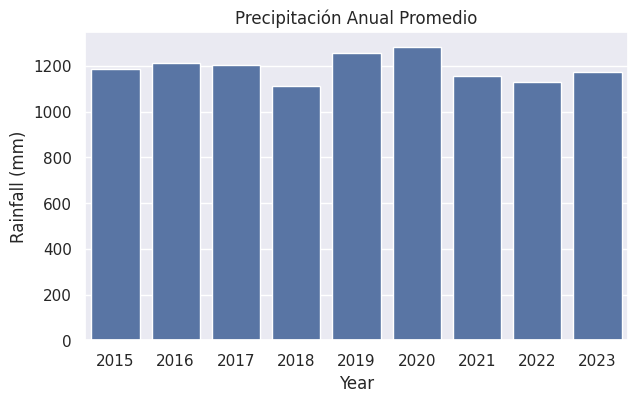

In [98]:
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = datapyear, x = "Year", 
            y = "Rainfall (mm)")
ax.set_title("Precipitación Anual Promedio")
plt.show()

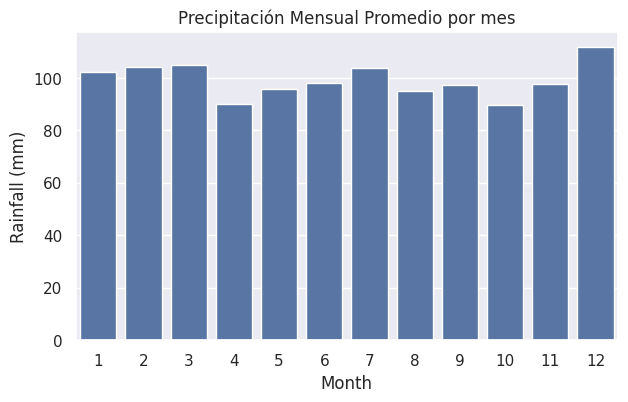

In [99]:
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = datapmes, x = "Month", 
            y = "Rainfall (mm)")
ax.set_title("Precipitación Mensual Promedio por mes")
plt.show()

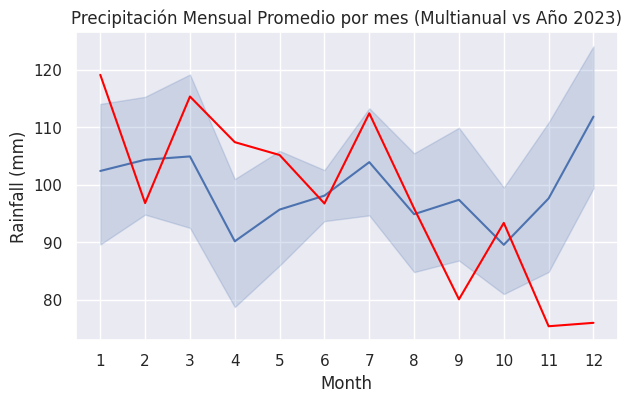

In [100]:
fig, ax = plt.subplots(figsize = (7,4))
sns.lineplot(data = datapmesyear, x = "Month", 
             y = "Rainfall (mm)", ax = ax)

dfr = datapmesyear[datapmesyear["Year"] == 2023]

sns.lineplot(data = datapmesyear[datapmesyear["Year"] == 2023], 
             x = "Month", y = "Rainfall (mm)",color="red", ax = ax)

ax.set_xticks(range(1, 13))
ax.set_title("Precipitación Mensual Promedio por mes (Multianual vs Año 2023)")

plt.show()

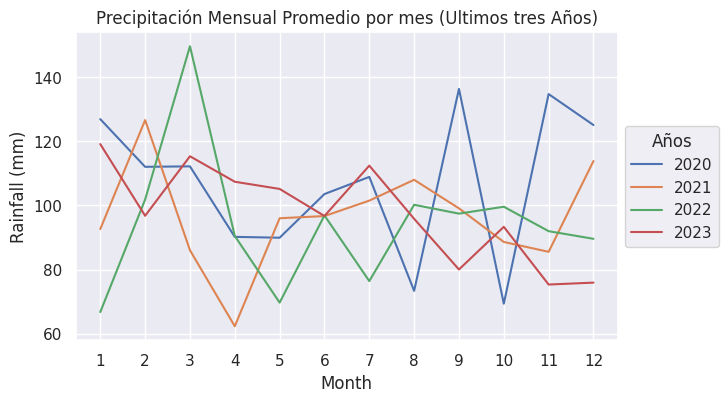

In [104]:
fig, ax = plt.subplots(figsize = (7,4))
dfr = datapmesyear[datapmesyear["Year"] == 2023]

for u in range(2020,2024):
    sns.lineplot(data = datapmesyear[datapmesyear["Year"] == u], 
                 x = "Month", y = "Rainfall (mm)",label = f"{u}", 
                 ax = ax)
ax.set_xticks(range(1, 13))
ax.set_title("Precipitación Mensual Promedio por mes (Ultimos tres Años)")
ax.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1,title="Años")
plt.show()